<a href="https://colab.research.google.com/github/ISRAEL-MP/Practica0_Comentario_codigo_-limpio/blob/main/Examen_uno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import glob
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [3]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['data.zip']), 'r')
data.extractall()

In [4]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive', force_remount=True)


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive


In [5]:
DIR_TRAIN = "/content/data/entrenamiento"
DIR_VALID= "/content/data/prueba"
DIR_TEST  = "/content/data/validacion"

In [6]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import np_utils
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
width_shape = 224
height_shape = 224
num_classes = 2
epochs = 5
batch_size = 32 

In [75]:
train_data_dir = '/content/data/entrenamiento'  
validation_data_dir = '/content/data/prueba'

In [76]:
train_datagen = ImageDataGenerator(  
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

Found 66 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [77]:
#Creación de modelo 
nb_train_samples = 33
nb_validation_samples = 9

model = Sequential()

inputShape = (height_shape, width_shape, 3)
model.add(Conv2D(32,(3,3), input_shape=inputShape))
model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D())
          
model.add(Conv2D(64,(3,3)))
model.add(Conv2D(64,(3,3)))
model.add(Conv2D(64,(3,3)))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(num_classes,activation='softmax', name='output'))

model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

model_history = model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_18 (Conv2D)          (None, 106, 106, 64)      36928     
                                                                 
 conv2d_19 (Conv2D)          (None, 104, 104, 64)      36928     
                                                      

<ipython-input-77-569c7422c166>:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(


Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 7.9555 - accuracy: 0.4688
Epoch 2/5
1/1 [==============================] - 1s 593ms/step - loss: 6.6297 - accuracy: 0.4375
Epoch 3/5
1/1 [==============================] - 0s 75ms/step - loss: 4.3510e-05 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 1s 542ms/step - loss: 10.5873 - accuracy: 0.4375
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 4.6647 - accuracy: 0.5000


In [78]:
nb_train_samples = 33
nb_validation_samples = 9

image_input = Input(shape=(width_shape, height_shape, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False
    

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

custom_vgg_model.summary()

model_history = custom_vgg_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

<ipython-input-78-344f15b88563>:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = custom_vgg_model.fit_generator(


Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.9464 - accuracy: 0.5312
Epoch 2/5
1/1 [==============================] - 1s 744ms/step - loss: 0.9864 - accuracy: 0.4688
Epoch 3/5
1/1 [==============================] - 1s 515ms/step - loss: 0.8171 - accuracy: 0.5938
Epoch 4/5
1/1 [==============================] - 1s 535ms/step - loss: 1.0088 - accuracy: 0.4688
Epoch 5/5
1/1 [==============================] - 1s 522ms/step - loss: 0.9133 - accuracy: 0.5000


In [79]:
custom_vgg_model.save("model_VGG16.h5")

In [80]:
def plotTraining(hist, epochs, typeData):
    
    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')
        

    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18) 
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

KeyError: ignored

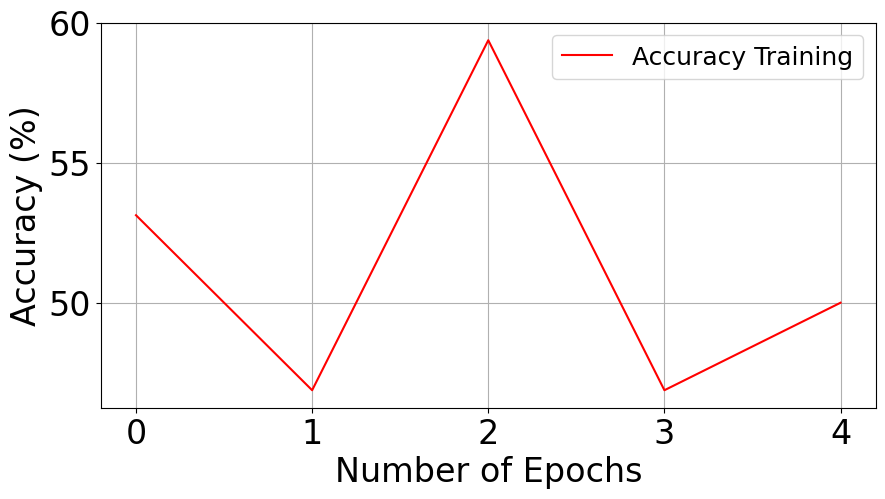

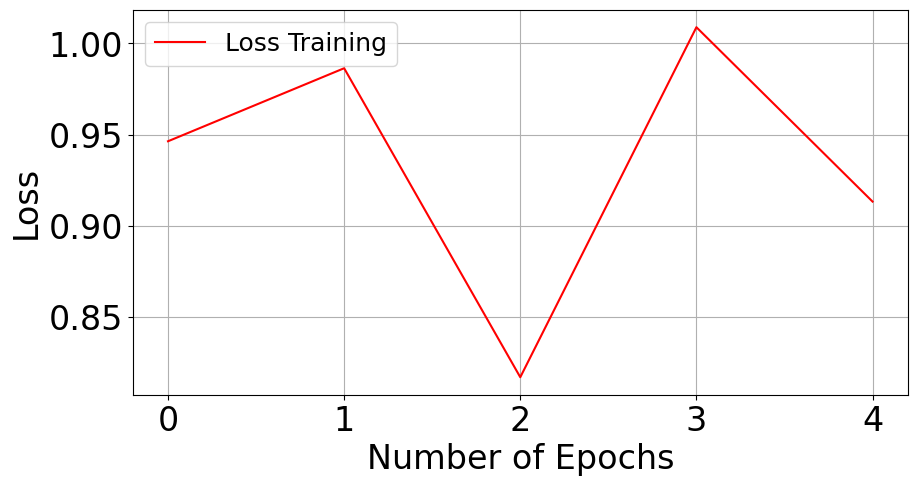

In [81]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")

1/1 [==============================] - 0s 143ms/step
Dog


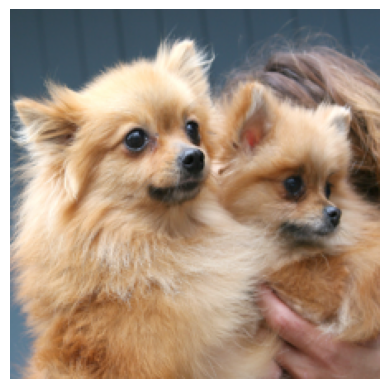

In [82]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['Cat','Dog']

modelt = load_model("model_VGG16.h5")
#modelt = custom_vgg_model

imaget_path = "/content/data/validacion/77.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 18 images belonging to 2 classes.


<ipython-input-83-3c52c0dff5da>:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = custom_Model.predict_generator(generator=test_generator)


              precision    recall  f1-score   support

           0     0.3333    0.2222    0.2667         9
           1     0.4167    0.5556    0.4762         9

    accuracy                         0.3889        18
   macro avg     0.3750    0.3889    0.3714        18
weighted avg     0.3750    0.3889    0.3714        18



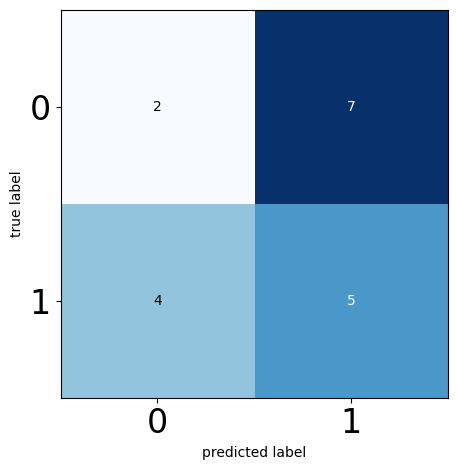

In [83]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


names = ['Cat','Dog']


test_data_dir = '/content/data/prueba'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("model_VGG16.h5")

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

matc=confusion_matrix(y_real, y_pred)
disp = plot_confusion_matrix(matc, cmap='Blues', show_normed=False)

plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))

In [84]:
print(y_real)

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


In [85]:
print(y_pred)

[1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1]
